### 1.1 Вычисление описательных статистик

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd


def descriptive_stat(sample):
    """
    Выводит описательную статистику:
    - мат. ожидание
    - дисперсия
    - стандартное отклонение
    - коэффициент вариации
    """
    print('Mean value is ', round(np.mean(sample),2))
    print('Variance is ', round(np.var(sample),2))
    print('St. deviation is ', round(np.std(sample),2))
    print('Variance coef is ', round(np.var(sample)/np.mean(sample),2))
    
    
if __name__ == '__main__':
    # чтение данных
    data = pd.read_csv('data/cars.csv', sep = ';')

    # сравним мощность Ауди и БМВ 

    audi = data[data['Make']=='Audi']['Horsepower'].values
    bmw = data[data['Make']=='BMW']['Horsepower'].values
    
    print('Audi stats: ')
    descriptive_stat(audi)
    
    print('================================')
    
    print('BMW stats: ')
    descriptive_stat(bmw)
    

Audi stats: 
Mean value is  250.79
Variance is  4769.11
St. deviation is  69.06
Variance coef is  19.02
BMW stats: 
Mean value is  241.45
Variance is  3484.15
St. deviation is  59.03
Variance coef is  14.43


### 1.2 Законы распределения

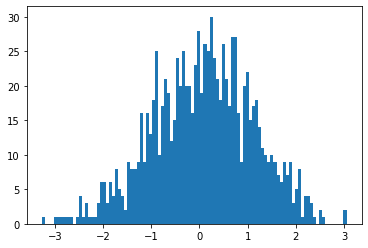

In [4]:
# нормальное распределение

from matplotlib import pyplot as plt

x = np.random.normal(0, 1, 1000)

plt.hist(x, bins = 100);

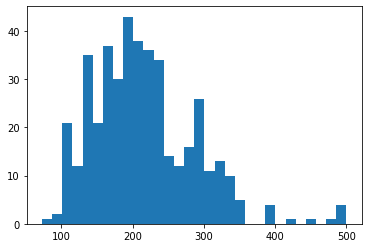

In [3]:
# график распределения мощности авто

plt.hist(data['Horsepower'].values, bins = 30);

### 1.3.1 ЦПТ

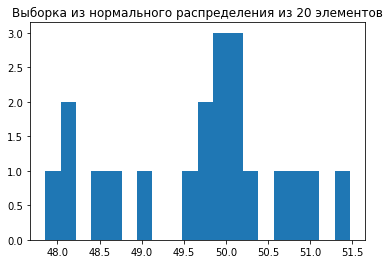

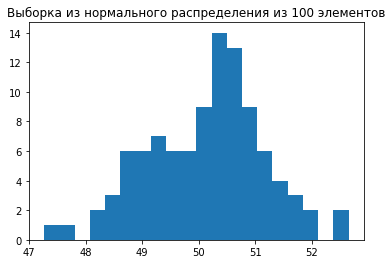

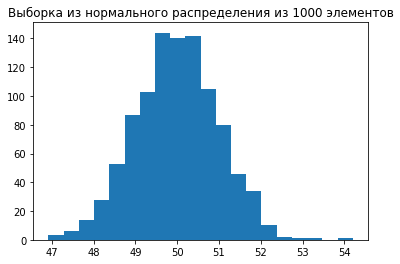

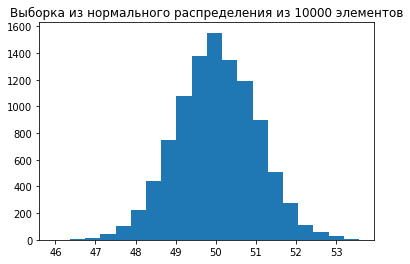

In [5]:
for i in [20,100,1000,10000]:
    n_size = i
    x = np.random.normal(50, 1, size = n_size)
    plt.figure()
    plt.hist(x, bins = 20)
    plt.title('Выборка из нормального распределения из {} элементов'.format(n_size))
    plt.show()

Чем больше элементов, тем больше похоже на нормальное распределение

In [6]:
# возьмем выборочные средние

for i in [10,20,50,100,1000,10000,1000000]:
    n_size = i
    x = np.random.normal(50, 5, size = n_size)
    print('Среднее для {} элементов :'.format(n_size), np.mean(x))
    print('====================================================')

Среднее для 10 элементов : 50.66533719373992
Среднее для 20 элементов : 50.067920420029296
Среднее для 50 элементов : 51.48806889350547
Среднее для 100 элементов : 50.21481223732869
Среднее для 1000 элементов : 50.21548425745313
Среднее для 10000 элементов : 49.95673709228899
Среднее для 1000000 элементов : 49.99977118709453


Чем больше элементов, тем ближе к среднему ГС.

### 1.3.2 ЦПТ: Доверительные интервалы

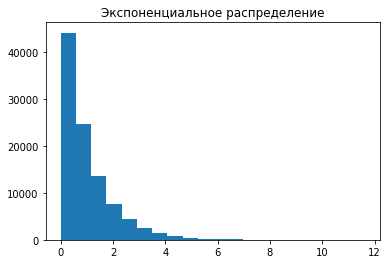

In [7]:
x = np.random.exponential(size = 100000)
plt.hist(x, bins = 20)
plt.title('Экспоненциальное распределение');

Среднее выборочных средних: 0.9978120754173312
Среднее генеральной совокупности: 1.0010229977455338


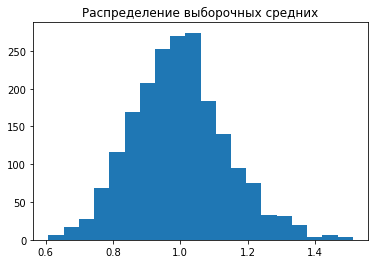

In [8]:
subs = []
for i in range(2000):
    t = x[np.random.choice(x.shape[0], size = 50)]
    subs.append(t)
 
subs_means = [np.mean(t) for t in subs]
plt.hist(subs_means, bins = 20)
plt.title('Распределение выборочных средних');

print('Среднее выборочных средних: {}'.format(np.mean(subs_means)))
print('Среднее генеральной совокупности: {}'.format(np.mean(x)))
print('====================================================')

In [9]:
print('Среднее выборочных средних: {}'.format(np.mean(subs_means)))
print('Среднее генеральной совокупности: {}'.format(np.mean(x)))

Среднее выборочных средних: 0.9978120754173312
Среднее генеральной совокупности: 1.0010229977455338


In [10]:
# стандартная ошибка

def get_se(sample):
    return np.std(sample)/np.sqrt(len(sample))

# 95% доверительный интервал

def confidence_interval_95(sample):
    lower = np.mean(sample) - 1.96*get_se(sample)
    upper = np.mean(sample) + 1.96*get_se(sample)
    return [lower, upper]

print('Доверительный интервал для выборочного среднего: ', confidence_interval_95(subs[1]))

Доверительный интервал для выборочного среднего:  [0.7981644680572694, 1.2539305642471354]


In [14]:
np.mean(x) > confidence_interval_95(subs[1000])[0] and np.mean(x) < confidence_interval_95(subs[1000])[1]

True

In [15]:
data.groupby('Make')['Make'].count()

Make
Acura             7
Audi             19
BMW              20
Buick             9
Cadillac          8
Chevrolet        27
Chrysler         15
Dodge            13
Ford             23
GMC               8
Honda            17
Hummer            1
Hyundai          12
Infiniti          8
Isuzu             2
Jaguar           12
Jeep              3
Kia              11
Land Rover        3
Lexus            11
Lincoln           9
MINI              2
Mazda            11
Mercedes-Benz    26
Mercury           9
Mitsubishi       13
Nissan           17
Oldsmobile        3
Pontiac          11
Porsche           7
Saab              7
Saturn            8
Scion             2
Subaru           11
Suzuki            8
Toyota           28
Volkswagen       15
Volvo            12
Name: Make, dtype: int64

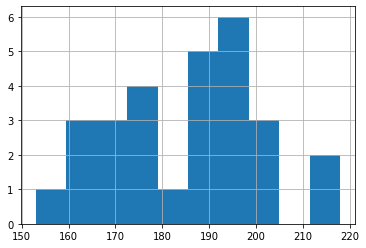

In [17]:
data[data['Make']=='Toyota']['Length'].hist();

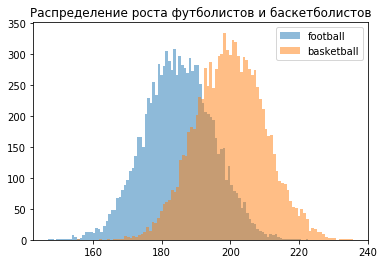

In [18]:
np.random.seed(17)

football = np.random.normal(185, 10, size=10000)
basketball = np.random.normal(200, 10, size=10000)


plt.hist(football, bins = 100, alpha=.5, label = 'football')
plt.hist(basketball, bins = 100, alpha=.5, label = 'basketball')
plt.title('Распределение роста футболистов и баскетболистов')
plt.legend();

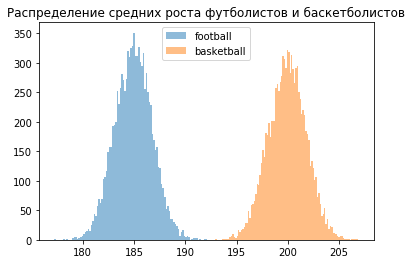

In [19]:
def get_samples_mean(data, n_iter=10000):
    subs = []
    for i in range(n_iter):
        t = data[np.random.choice(data.shape[0], size = 30)]
        subs.append(np.mean(t))
    return subs

football_s = get_samples_mean(football)
basketball_s = get_samples_mean(basketball)

plt.hist(football_s, bins = 100, alpha=.5, label = 'football')
plt.hist(basketball_s, bins = 100, alpha=.5, label = 'basketball')
plt.title('Распределение средних роста футболистов и баскетболистов')
plt.legend();

In [22]:
confidence_interval_95(football_s)

[184.89458542097742, 184.96582719373782]

In [23]:
confidence_interval_95(basketball_s)

[199.90336943747138, 199.97534558039354]

### Проверка статистических гипотез
### 2.1.1 Z-test

In [61]:
from scipy import stats

se = get_se(football_s)

z_stat = (np.mean(football)-184.73)/np.sqrt(se)

In [62]:
def p_value_z(z_stat, alternative = 'two-sided'):
    '''p_value для нормального распределения'''
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)
    
p_value_z(z_stat)

0.13396155274981236

In [58]:
np.mean(football)

184.93203554469886

In [67]:
stats.zscore(football, axis = 0)

array([ 0.28283574, -1.84635242,  0.63019268, ...,  1.21673103,
        0.31477478, -0.46500092])